# Otsu's Method

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
img = cv2.imread('/home/lmelvix/projects/computer-vision/data/can_pix.png',0)

In [37]:
def otsu(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    # find normalized_histogram, and its cumulative distribution function
    hist = cv2.calcHist([blur],[0],None,[256],[0,256])
    hist_norm = hist.ravel()/hist.max()
    print "hist_norm"
    print hist_norm
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in xrange(1,256):
        p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
        q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
        b1,b2 = np.hsplit(bins,[i]) # weights
        # finding means and variances
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
        # calculates the minimization function
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    # find otsu's threshold value with OpenCV function
    ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    print thresh,ret
    plt.imshow(otsu)
    plt.show()

In [38]:
def inbuilt_otsu(img):
    # global thresholding
    ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.imshow(th3)
    plt.show()

hist_norm
[ 0.03827073  0.55988663  1.          0.63855422  0.64068037  0.49468461
  0.50106305  0.60311836  0.45074415  0.41034728  0.44578314  0.19702339
  0.28915662  0.23671155  0.25230333  0.25017717  0.15237421  0.31608787
  0.46066618  0.2515946   0.37703755  0.36853296  0.2388377   0.33593196
  0.49326718  0.52019846  0.7484054   0.39333805  0.10418143  0.0411056
  0.04394047  0.03543586  0.03685329  0.04323175  0.04464918  0.03118356
  0.03827073  0.03756201  0.03756201  0.03330971  0.01700921  0.02551382
  0.03330971  0.02763997  0.02834869  0.0248051   0.03685329  0.02976612
  0.04323175  0.03897945  0.03897945  0.04181432  0.03614458  0.03614458
  0.03968817  0.0453579   0.03401843  0.03897945  0.04181432  0.03189227
  0.03756201  0.04181432  0.04394047  0.04819277  0.0496102   0.04323175
  0.04748406  0.05953225  0.05244507  0.05457123  0.06024097  0.04464918
  0.06378455  0.06307583  0.05031892  0.05173636  0.06520198  0.06520198
  0.05953225  0.06024097  0.07158044  0.07

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


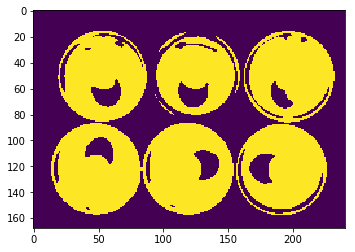

In [39]:
otsu(img)

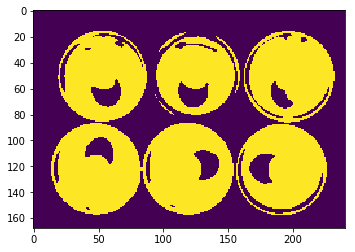

In [25]:
inbuilt_otsu(img)

In [31]:
blur = cv2.GaussianBlur(img,(5,5),0)
hist = cv2.calcHist([blur],[0],None,[256],[0,256])

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 168 x 241)
  '(shape is %d x %d)' % inp.shape[::-1])


([array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 142.,   26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 141.,   27.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 138.,   30.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 136.,   32.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 135.,   33.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 134.,   34.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 120.,   48.,    0.

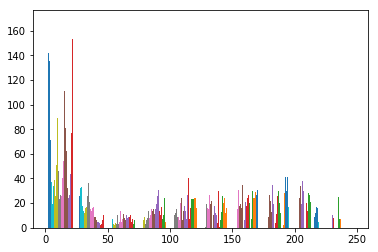

In [33]:
plt.hist(blur)